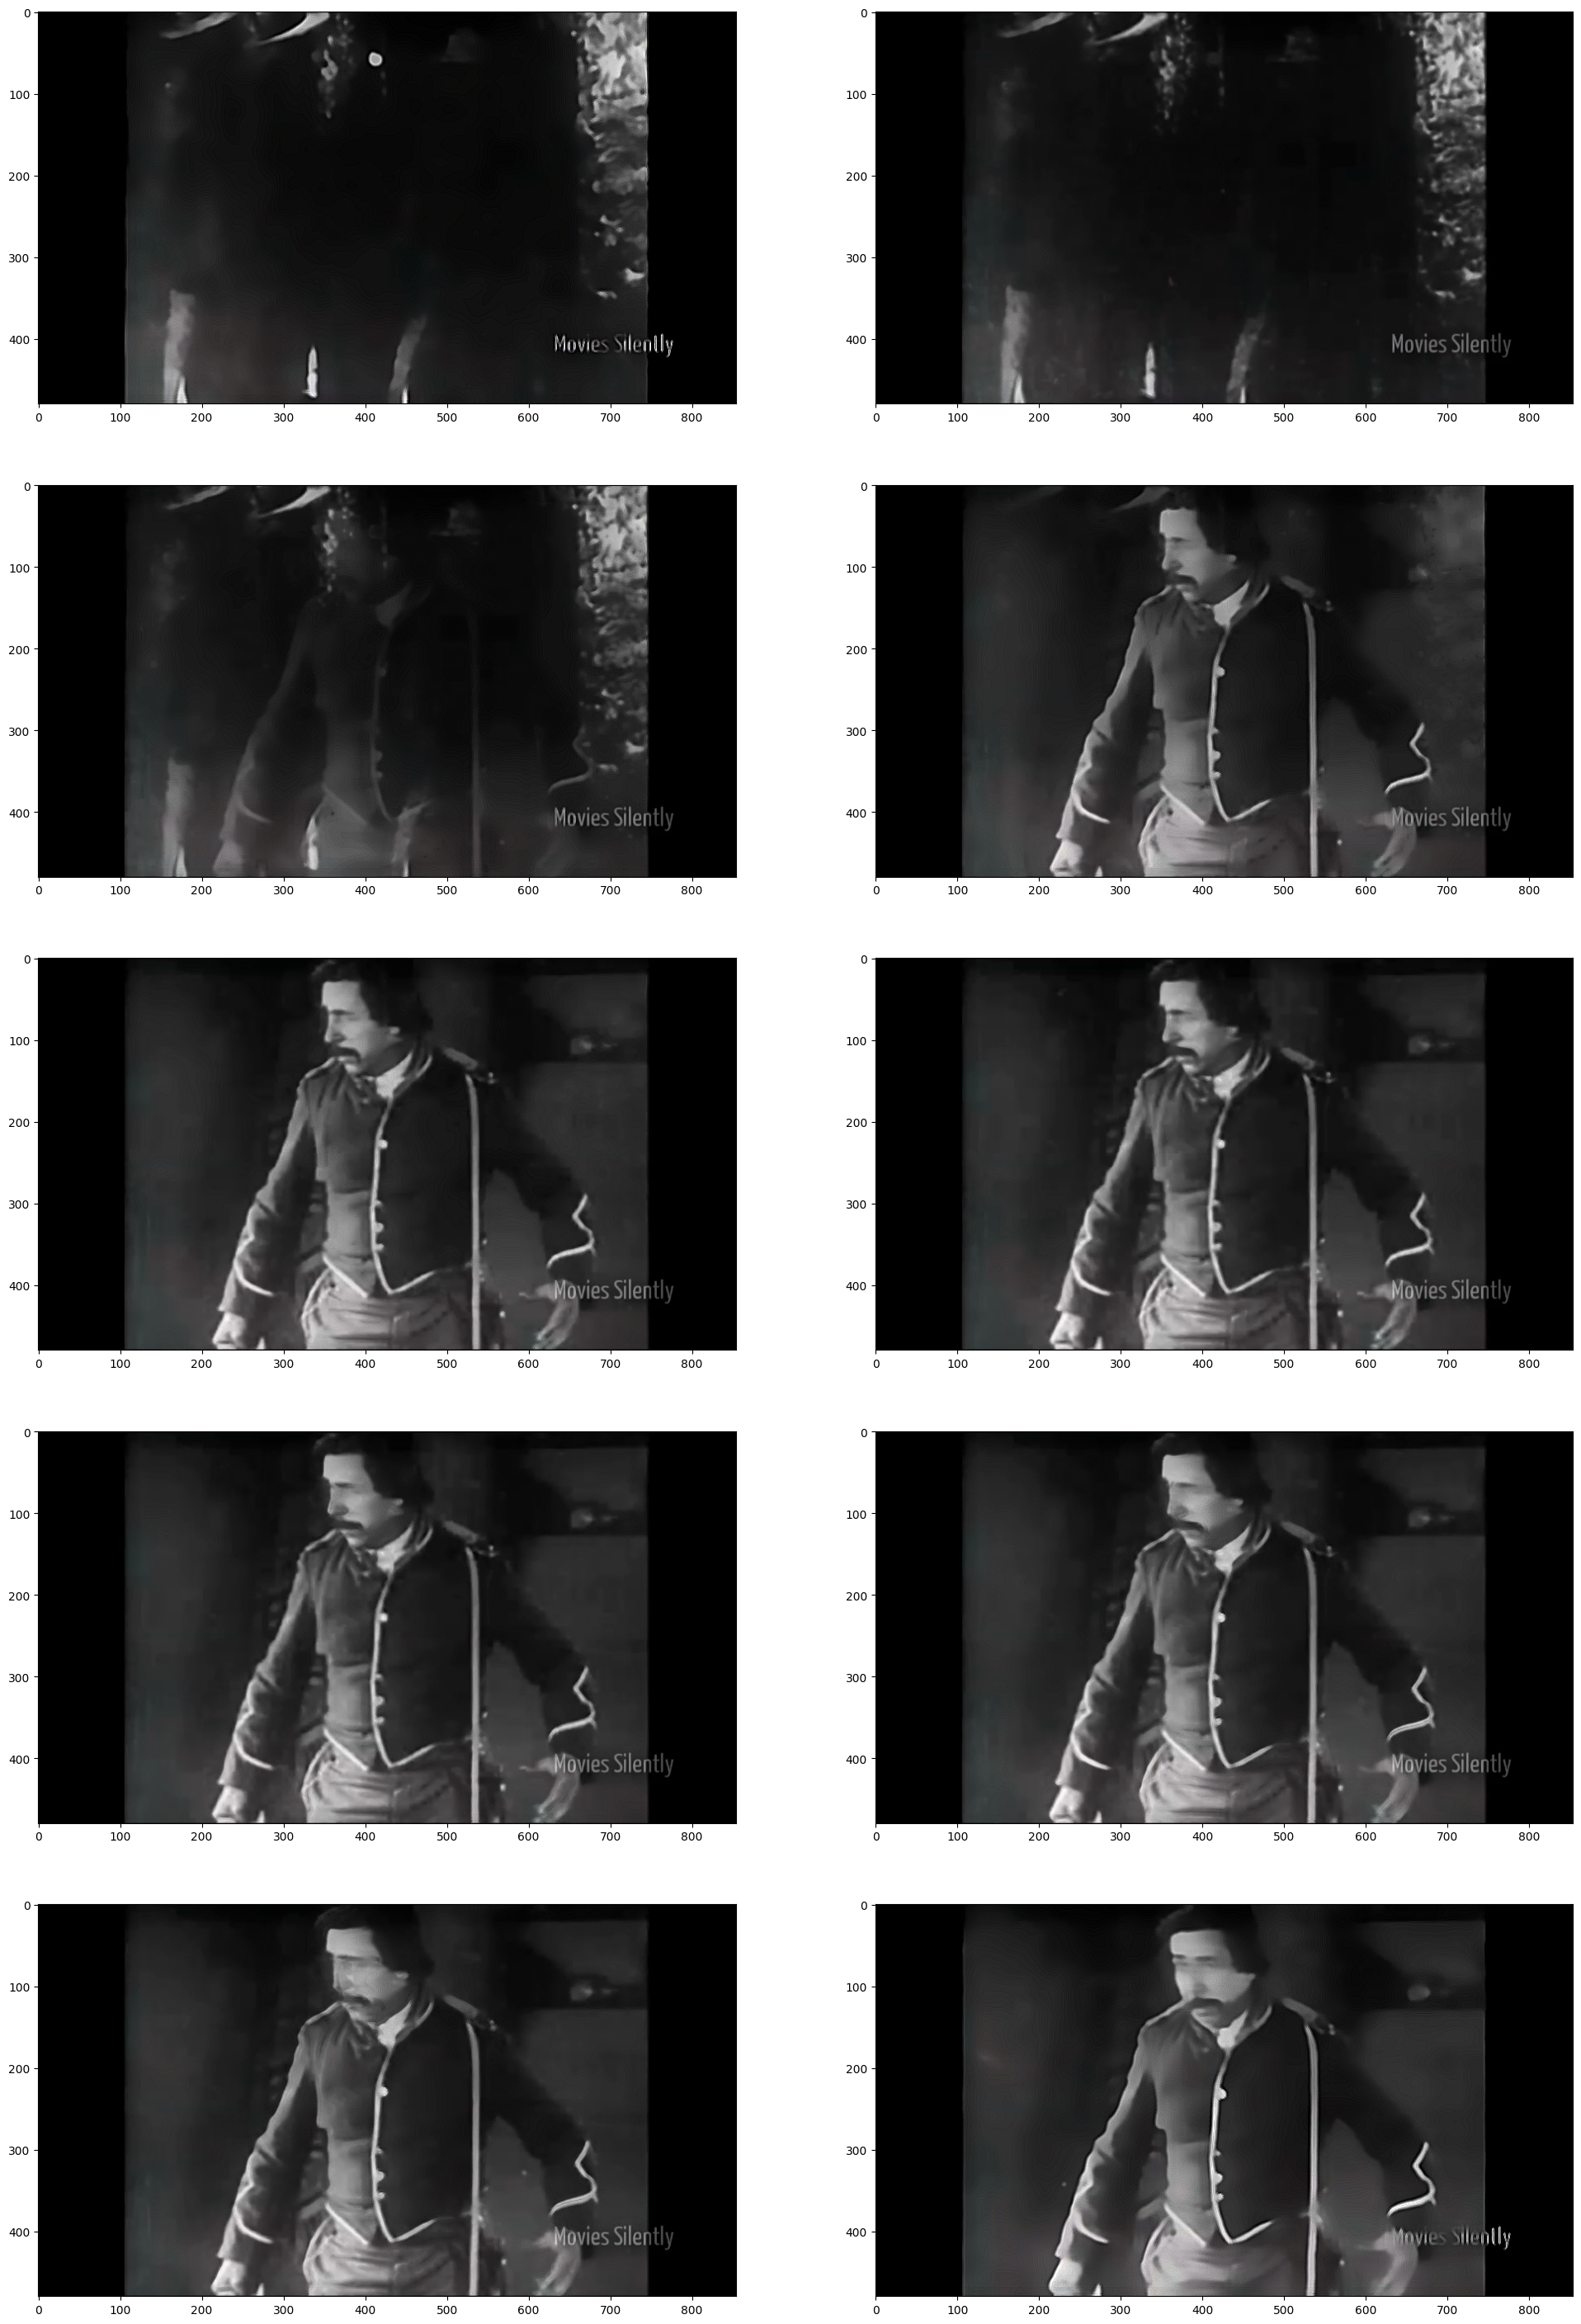

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Please DO NOT add any additional imports to this notebook
# Functionality using libraries other than those listed above will not be graded


def process_frames(video_cap: cv2.VideoCapture) -> np.ndarray:
    """
    """
    frames_to_read = 10
    processed_frames = []
    frame_buffer = []

    noise_reduction_strength = 30
    median_blur_ksize = 3
    motion_stabilization_threshold = 5
    sharpening_kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])

    while len(frame_buffer) < frames_to_read:
        ret, frame = video_cap.read()
        if not ret:
            break
        frame_buffer.append(frame)

    for i, frame in enumerate(frame_buffer):
        denoised_frame = cv2.fastNlMeansDenoisingColored(frame, None, noise_reduction_strength, noise_reduction_strength, 7, 21)
        blurred_frame = cv2.medianBlur(denoised_frame, median_blur_ksize)
        sharpened_frame = cv2.filter2D(blurred_frame, -1, sharpening_kernel)

        if i > 0:
            prev_frame = frame_buffer[i - 1]
            next_frame = frame_buffer[i + 1] if i + 1 < len(frame_buffer) else sharpened_frame
            # Use temporal median filtering across 3 frames
            frames_window = np.stack([prev_frame, sharpened_frame, next_frame], axis=0)
            stabilized_frame = np.median(frames_window, axis=0).astype(np.uint8)
        else:
            stabilized_frame = sharpened_frame

        original_mean_brightness = np.mean(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
        processed_mean_brightness = np.mean(cv2.cvtColor(stabilized_frame, cv2.COLOR_BGR2GRAY))
        brightness_ratio = original_mean_brightness / processed_mean_brightness if processed_mean_brightness > 0 else 1
        normalized_frame = cv2.convertScaleAbs(stabilized_frame, alpha=brightness_ratio, beta=0)
        processed_frames.append(normalized_frame)

    return np.array(processed_frames)


# Please DO NOT change any of the code below. All modifications to this template should
# occur inside the **process_image** function

fig, axs = plt.subplots(5, 2)
fig.set_size_inches(24, 36)

video_cap = cv2.VideoCapture('./Zorro.mp4')
[video_cap.read() for _ in range(88)]
frames = process_frames(video_cap)

video_cap.release()

for i in range(5):
    for j in range(2):
        axs[i, j].imshow(frames[i*2 + j])

# [cv2.imwrite(f"./frame_{i:02}.jpg", frame) for i, frame in enumerate(frames)]
plt.show()

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def process_frames2(video_cap: cv2.VideoCapture, num_frames) -> np.ndarray:
    frames_to_read = num_frames
    processed_frames = []
    frame_buffer = []

    noise_reduction_strength = 30
    median_blur_ksize = 3
    motion_stabilization_threshold = 5
    sharpening_kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])

    while len(frame_buffer) < frames_to_read:
        ret, frame = video_cap.read()
        if not ret:
            break
        frame_buffer.append(frame)

    for i, frame in enumerate(frame_buffer):
        denoised_frame = cv2.fastNlMeansDenoisingColored(frame, None, noise_reduction_strength, noise_reduction_strength, 7, 21)
        blurred_frame = cv2.medianBlur(denoised_frame, median_blur_ksize)
        sharpened_frame = cv2.filter2D(blurred_frame, -1, sharpening_kernel)

        if i > 0:
            prev_frame = frame_buffer[i - 1]
            next_frame = frame_buffer[i + 1] if i + 1 < len(frame_buffer) else sharpened_frame
            # Use temporal median filtering across 3 frames
            frames_window = np.stack([prev_frame, sharpened_frame, next_frame], axis=0)
            stabilized_frame = np.median(frames_window, axis=0).astype(np.uint8)
        else:
            stabilized_frame = sharpened_frame

        original_mean_brightness = np.mean(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
        processed_mean_brightness = np.mean(cv2.cvtColor(stabilized_frame, cv2.COLOR_BGR2GRAY))
        brightness_ratio = original_mean_brightness / processed_mean_brightness if processed_mean_brightness > 0 else 1
        normalized_frame = cv2.convertScaleAbs(stabilized_frame, alpha=brightness_ratio, beta=0)
        processed_frames.append(normalized_frame)

    return np.array(processed_frames)


In [3]:
video_cap2 = cv2.VideoCapture('./Zorro.mp4')

# Get the number of frames in the video
num_frames = int(video_cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Number of frames in the video: {num_frames}")

frames2 = process_frames2(video_cap2, num_frames)
video_cap2.release()

Number of frames in the video: 704


In [4]:
for frame in frames2:
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()

2024-10-14 13:12:01.825 python[70398:1613142] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-14 13:12:01.825 python[70398:1613142] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [5]:
video = cv2.VideoCapture('./Zorro.mp4')

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
video.release()

In [6]:
# Write out frames2 to a video file 'mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('processed_video.mp4', fourcc, 30, (frames2.shape[2], frames2.shape[1]))

for frame in frames2:
    out.write(frame)

out.release()